Here, I am going to perform a data analysis on the anime statistics. The dataset is retrieved from the Kaggle dataset.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import collections
import os

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive/', force_remount=True)


Mounted at /content/gdrive/


In [ ]:
%cd gdrive/MyDrive

/content/gdrive/MyDrive


In case you run the file on colab and it doesn't work, then it is most possibly because of importing issue, since i directly added the csv file from my drive to collab, i will be submitting my csv file too which you can add from local device. (Thank you for reading this note, i also added the code to upload from the local drive in the next line).

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving anime.csv to anime (1).csv


In [ ]:
list_files = []
for file in os.listdir():
  if file.endswith('.csv'):
    df = pd.read_csv(file)
    list_files.append(df)

In [ ]:
df.head()

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


In [ ]:
df.head(10)

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266
5,32935,Haikyuu!!: Karasuno Koukou VS Shiratorizawa Ga...,"Comedy, Drama, School, Shounen, Sports",TV,10,9.15,93351
6,11061,Hunter x Hunter (2011),"Action, Adventure, Shounen, Super Power",TV,148,9.13,425855
7,820,Ginga Eiyuu Densetsu,"Drama, Military, Sci-Fi, Space",OVA,110,9.11,80679
8,15335,Gintama Movie: Kanketsu-hen - Yorozuya yo Eien...,"Action, Comedy, Historical, Parody, Samurai, S...",Movie,1,9.10,72534
9,15417,Gintama&#039;: Enchousen,"Action, Comedy, Historical, Parody, Samurai, S...",TV,13,9.11,81109


Deleting the "anime_id" column (as it's useless) and getting some information about the DataFrame:

In [ ]:
df = df.drop(["anime_id"], axis = 1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12294 entries, 0 to 12293
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      12294 non-null  object 
 1   genre     12232 non-null  object 
 2   type      12269 non-null  object 
 3   episodes  12294 non-null  object 
 4   rating    12064 non-null  float64
 5   members   12294 non-null  int64  
dtypes: float64(1), int64(1), object(4)
memory usage: 576.4+ KB


In [ ]:
df.duplicated().sum()

0

In [ ]:
df.isnull().sum()

name          0
genre        62
type         25
episodes      0
rating      230
members       0
dtype: int64


As we will only analyze the DataFrame and as each anime is kind of unique, it makes no sense to work with NaN values of rating.

In [ ]:
df = df.drop(list(df.loc[df["rating"].isnull() == True].index), axis = 0)
df = df.fillna("Unknown")
df = df.reset_index(drop = True)
df.tail(10)

,name,genre,type,episodes,rating,members
12054,Silent Chaser Kagami,Hentai,OVA,1,4.95,112
12055,Super Erotic Anime,Hentai,OVA,2,4.45,118
12056,Teleclub no Himitsu,Hentai,OVA,2,4.67,148
12057,Tenshi no Habataki Jun,Hentai,OVA,1,4.33,201
12058,The Satisfaction,Hentai,OVA,1,4.37,166
12059,Toushindai My Lover: Minami tai Mecha-Minami,Hentai,OVA,1,4.15,211
12060,Under World,Hentai,OVA,1,4.28,183
12061,Violence Gekiga David no Hoshi,Hentai,OVA,4,4.88,219
12062,Violence Gekiga Shin David no Hoshi: Inma Dens...,Hentai,OVA,1,4.98,175
12063,Yasuji no Pornorama: Yacchimae!!,Hentai,Movie,1,5.46,142


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12064 entries, 0 to 12063
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      12064 non-null  object 
 1   genre     12064 non-null  object 
 2   type      12064 non-null  object 
 3   episodes  12064 non-null  object 
 4   rating    12064 non-null  float64
 5   members   12064 non-null  int64  
dtypes: float64(1), int64(1), object(4)
memory usage: 565.6+ KB


As we can see, the number of episodes is not an integer type. It happens because there are some Animes that are not finished yet (the number of episodes are "Unknown"), so let's separate it in two DataFrames

In [ ]:
df_all = df.copy()
df_completed = df.drop(list(df.loc[df["episodes"] == "Unknown"].index), axis = 0).copy()
df_completed = df_completed.reset_index(drop = True)
print("Number of all Animes:", df_all.shape[0])
print("Number of completed Animes:", df_completed.shape[0])

Number of all Animes: 12064
Number of completed Animes: 11876


And then, transform it into int64 data type.

In [ ]:
df_completed["episodes"] = df_completed["episodes"].astype("int64")
df_completed.dtypes

name         object
genre        object
type         object
episodes      int64
rating      float64
members       int64
dtype: object

In [ ]:
df_all.describe().T

,count,mean,std,min,25%,50%,75%,max
rating,12064.0,6.473902,1.026746,1.67,5.88,6.57,7.18,10.0
members,12064.0,18279.524038,55275.784229,12.00,221.00,1539.00,9485.50,1013917.0


In [ ]:
df_completed.describe().T

,count,mean,std,min,25%,50%,75%,max
episodes,11876.0,12.447289,47.011062,1.00,1.00,2.00,12.0000,1818.0
rating,11876.0,6.480333,1.021995,1.67,5.89,6.57,7.1825,10.0
members,11876.0,18441.460593,55275.481351,12.00,229.00,1572.50,9766.2500,1013917.0


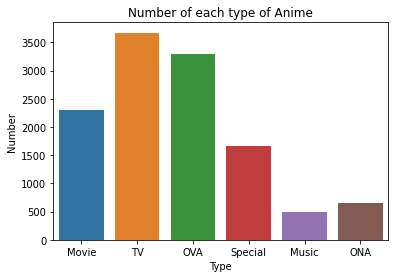

In [ ]:
sns.countplot(data = df_all, x = "type")
plt.title("Number of each type of Anime")
plt.xlabel("Type")
plt.ylabel("Number")
plt.show()

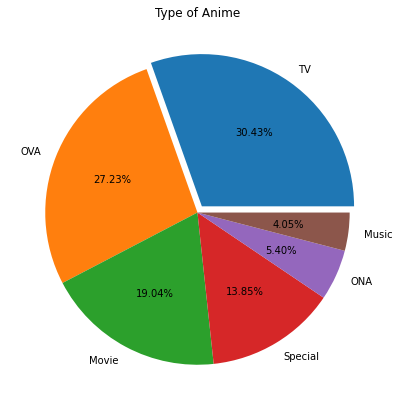

In [ ]:
df_pie = df_all["type"].value_counts()

plt.figure(figsize = (7, 7))
plt.pie(labels = df_pie.index, x = df_pie.values, autopct = "%0.2f%%", explode = [0.05, 0, 0, 0, 0, 0])
plt.title("Type of Anime")
plt.show()

Most common genres among all types of Animes:

In [ ]:
for item in list(df_all["genre"].index):
    df_all.loc[item, "genre"] = df_all.loc[item, "genre"] + ","

genre = []
for item in list(df_all["genre"].sum().split(",")):
    genre.append(item.strip())

counter = collections.Counter(genre)
genre_dict = dict(sorted(dict(counter).items(), key=lambda item: item[1], reverse = True))
del genre_dict[""]
df_genre = pd.Series(data = genre_dict)
df_genre

Comedy           4575
Action           2768
Adventure        2316
Fantasy          2242
Sci-Fi           2036
Drama            1977
Shounen          1684
Kids             1598
Romance          1437
Slice of Life    1204
School           1176
Hentai           1133
Supernatural     1001
Mecha             929
Music             842
Historical        798
Magic             747
Ecchi             628
Shoujo            594
Sports            533
Seinen            532
Mystery           485
Super Power       451
Military          416
Parody            403
Space             377
Horror            362
Harem             313
Demons            287
Martial Arts      264
Dementia          238
Psychological     226
Police            195
Game              177
Samurai           146
Vampire           100
Thriller           86
Cars               72
Shounen Ai         62
Shoujo Ai          54
Josei              52
Unknown            47
Yuri               41
Yaoi               38
dtype: int64

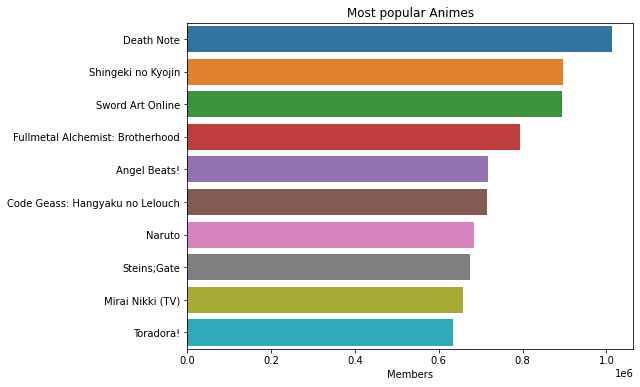

In [ ]:
plt.figure(figsize = (8,6))
df_members = df_all.sort_values(by = "members", ascending = False).copy()
sns.barplot(data = df_members.iloc[0:10], y = "name", x = "members")
plt.title("Most popular Animes", size = 12)
plt.xlabel("Members")
plt.ylabel("")
plt.show()

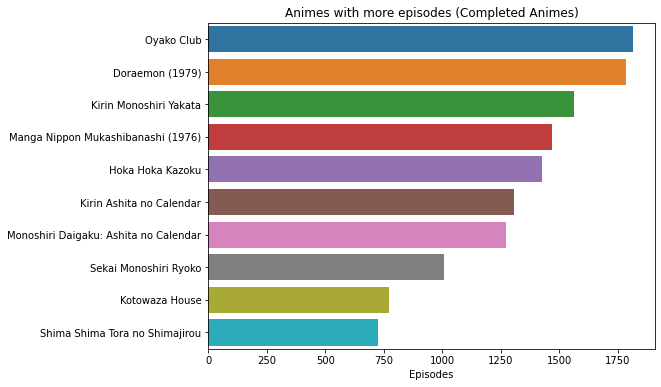

In [ ]:
plt.figure(figsize = (8,6))
df_episodes = df_completed.sort_values(by = "episodes", ascending = False).copy()
sns.barplot(data = df_episodes.iloc[0:10], x = "episodes", y = "name")
plt.title("Animes with more episodes (Completed Animes)", size = 12)
plt.xlabel("Episodes")
plt.ylabel("")
plt.show()

In [ ]:
df_rating = df_all.sort_values(by = "rating", ascending = False).copy()
df_rating = df_rating.drop(list(df_rating.loc[df_rating["members"] < 1000].index), axis = 0)
df_rating = df_rating.drop(["genre", "episodes", "members"], axis = 1)
df_rating = df_rating.reset_index(drop = True)
df_rating.head(10)

,name,type,rating
0,Kimi no Na wa.,Movie,9.37
1,Fullmetal Alchemist: Brotherhood,TV,9.26
2,Gintama°,TV,9.25
3,Steins;Gate,TV,9.17
4,Gintama&#039;,TV,9.16
5,Haikyuu!!: Karasuno Koukou VS Shiratorizawa Ga...,TV,9.15
6,Hunter x Hunter (2011),TV,9.13
7,Gintama&#039;: Enchousen,TV,9.11
8,Ginga Eiyuu Densetsu,OVA,9.11
9,Gintama Movie: Kanketsu-hen - Yorozuya yo Eien...,Movie,9.10


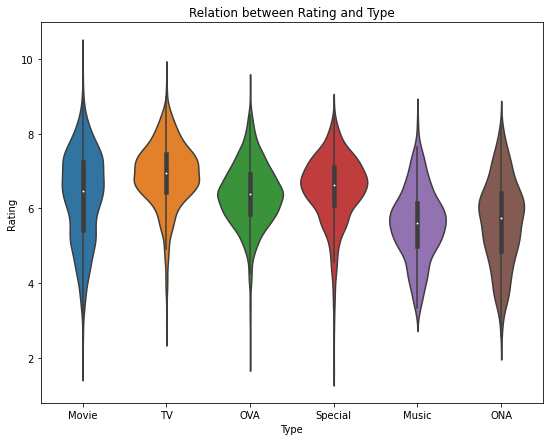

In [ ]:
plt.figure(figsize = (9,7))
sns.violinplot(data = df_all, x = "type", y = "rating")
plt.title("Relation between Rating and Type", size = 12)
plt.xlabel("Type")
plt.ylabel("Rating")
plt.show()

Now let's look at the most famous type of Anime: TV.

In [ ]:
df_completed_tv = df_completed.loc[df_completed["type"] == "TV"].copy()
df_completed_tv = df_completed_tv.reset_index(drop = True)
df_completed_tv.head(10)

,name,genre,type,episodes,rating,members
0,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
1,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
2,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
3,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266
4,Haikyuu!!: Karasuno Koukou VS Shiratorizawa Ga...,"Comedy, Drama, School, Shounen, Sports",TV,10,9.15,93351
5,Hunter x Hunter (2011),"Action, Adventure, Shounen, Super Power",TV,148,9.13,425855
6,Gintama&#039;: Enchousen,"Action, Comedy, Historical, Parody, Samurai, S...",TV,13,9.11,81109
7,Clannad: After Story,"Drama, Fantasy, Romance, Slice of Life, Supern...",TV,24,9.06,456749
8,Gintama,"Action, Comedy, Historical, Parody, Samurai, S...",TV,201,9.04,336376
9,Code Geass: Hangyaku no Lelouch R2,"Action, Drama, Mecha, Military, Sci-Fi, Super ...",TV,25,8.98,572888


In [ ]:
df_completed_tv.describe().T

,count,mean,std,min,25%,50%,75%,max
episodes,3570.0,35.969468,80.722257,2.0,12.00,24.00,39.00,1818.00
rating,3570.0,6.929143,0.830809,3.0,6.47,6.96,7.47,9.26
members,3570.0,44614.050980,90524.738303,12.0,532.00,6769.50,47493.75,1013917.00


Getting the correlation of each numeric information, to see how one impact in another.

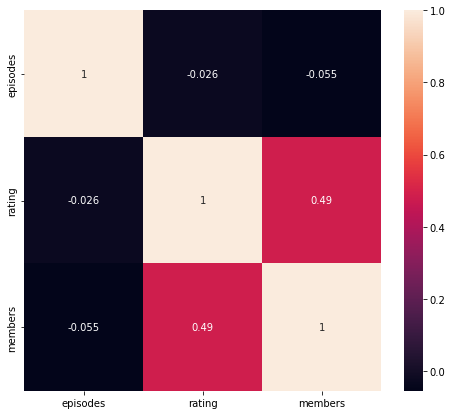

In [ ]:
plt.figure(figsize = (8,7))
sns.heatmap(data = df_completed_tv.corr(), annot = True)
plt.show()

With this, it's possible to see a strong correlation:

MORE MEMBERS = BETTER RATING (which makes sense, because if an anime has many members, it is possible to say that many people liked it).

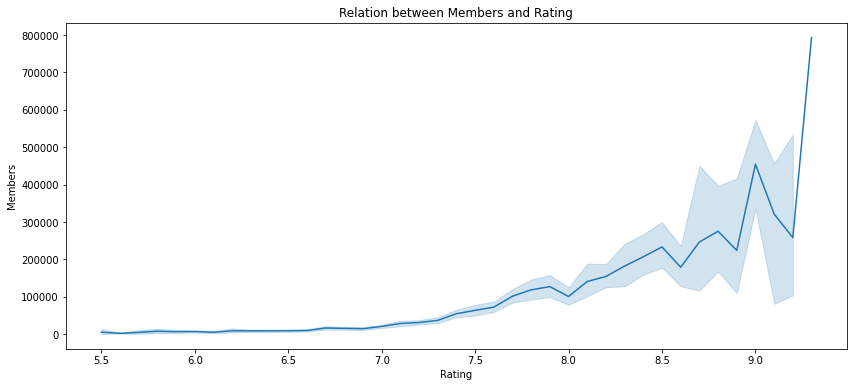

In [ ]:
plt.figure(figsize = (14, 6))
sns.lineplot(data = round(df_completed_tv.loc[df_completed_tv["rating"] >= 5.5, ["members", "rating"]]*10)/10,
            x = "rating", y = "members")
plt.title("Relation between Members and Rating", size = 12)
plt.xlabel("Rating")
plt.ylabel("Members")
plt.show()

In [ ]:
df.sort_values(by = 'episodes' , ascending =False ).head(5)

,name,genre,type,episodes,rating,members
11206,Pinkerton,Hentai,OVA,Unknown,6.63,1648
5650,Future Card Buddyfight DDD,Game,TV,Unknown,6.39,912
8687,Gohan Kaijuu Pap,"Action, Comedy, Kids",TV,Unknown,4.25,104
5920,Beyblade Burst,"Action, Adventure, Sci-Fi, Shounen, Sports",TV,Unknown,6.31,3221
8704,Gra-P &amp; Rodeo 2nd Season,"Comedy, Music",TV,Unknown,3.92,157


In [ ]:
df.sort_values(by = 'members' , ascending =False ).head(5)

,name,genre,type,episodes,rating,members
40,Death Note,"Mystery, Police, Psychological, Supernatural, ...",TV,37,8.71,1013917
86,Shingeki no Kyojin,"Action, Drama, Fantasy, Shounen, Super Power",TV,25,8.54,896229
804,Sword Art Online,"Action, Adventure, Fantasy, Game, Romance",TV,25,7.83,893100
1,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
159,Angel Beats!,"Action, Comedy, Drama, School, Supernatural",TV,13,8.39,717796


In [ ]:
df.sort_values(by = 'rating' , ascending =False ).head(5)

,name,genre,type,episodes,rating,members
10462,Taka no Tsume 8: Yoshida-kun no X-Files,"Comedy, Parody",Movie,1,10.00,13
10398,Spoon-hime no Swing Kitchen,"Adventure, Kids",TV,Unknown,9.60,47
9594,Mogura no Motoro,Slice of Life,Movie,1,9.50,62
0,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
9077,Kahei no Umi,Historical,Movie,1,9.33,44


we can also check the number of episodes in different genre.

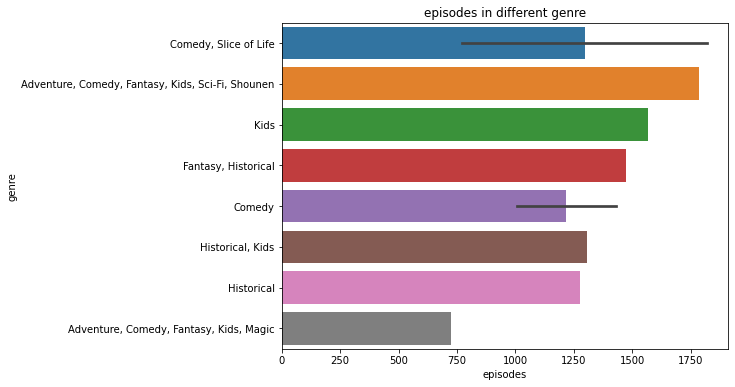

In [ ]:
plt.figure(figsize = (8,6))
df_episodes = df_completed.sort_values(by = "episodes", ascending = False).copy()
sns.barplot(data = df_episodes.iloc[0:10], x = "episodes", y = "genre")
plt.xlabel("episodes")
plt.ylabel("genre")
plt.title("episodes in different genre")
plt.show()